In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

Figure 1: convergence of selected $\lambda$ as a function of sample size and privacy budget

Non-private, gridpoints = 10
Coefficient (slope): -1.040604688680461
Intercept: 4.356890332093215

Non-private, gridpoints = 50
Coefficient (slope): -1.3871821449797193
Intercept: 6.607910264561471

Non-private, gridpoints = 100
Coefficient (slope): -0.8581789745821374
Intercept: 3.01222539777903

Method: PS, epsilon = 0.05, gridpoints = 10
Coefficient (slope): -3.6330754596518555
Intercept: 19.27639300446609
Method: PS, epsilon = 0.05, gridpoints = 50
Coefficient (slope): -0.053317434571616584
Intercept: -0.5899113839490213
Method: PS, epsilon = 0.05, gridpoints = 100
Coefficient (slope): -0.5440699599497364
Intercept: 1.9688925968316413
Method: BO, epsilon = 0.05, gridpoints = 10
Coefficient (slope): 2.428321446929391
Intercept: -18.83312021156339
Method: BO, epsilon = 0.05, gridpoints = 50
Coefficient (slope): -0.5174474437683584
Intercept: 2.4033781535703582
Method: BO, epsilon = 0.05, gridpoints = 100
Coefficient (slope): 0.6255976954861974
Intercept: -4.492127159963836
Method: PS

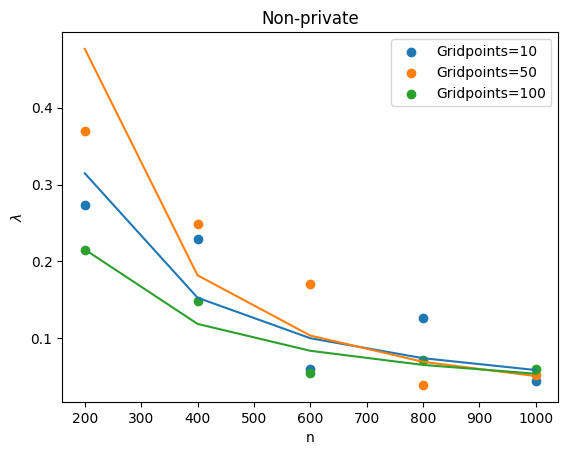

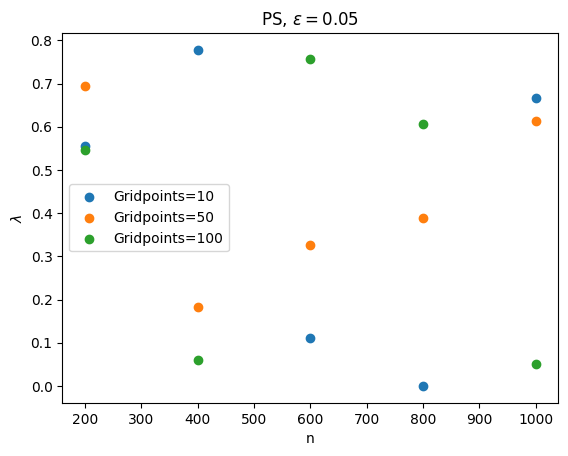

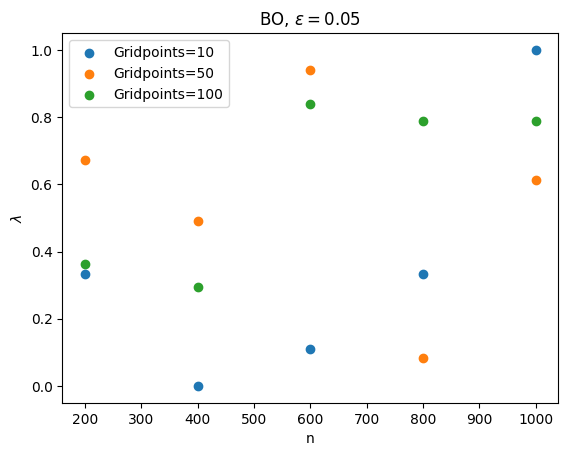

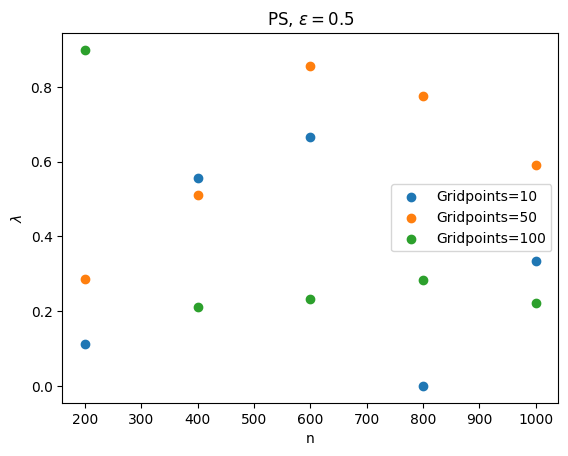

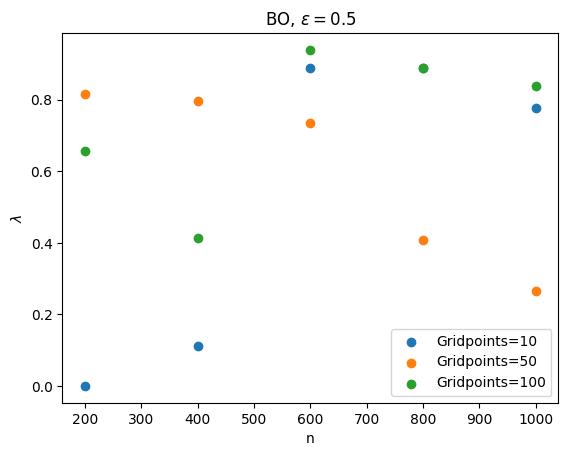

In [2]:
# Sample sizes considered
ns = [200, 400, 600, 800, 1000]

# Grid sizes considered
ngrids = [10, 50, 100]

plt.figure()
# NP_exponent = []
for g in range(len(ngrids)):
    ### Non-private
    NP = []
    for i in range(len(ns)):
        file = "exp1_" + str(ns[i]) + "_non-private_" + str(ngrids[g]) +".csv"
        dat = pd.read_csv(file)
    
        NP_n = np.mean(dat["NP_lambda_hat"])
        NP.append(NP_n)

    # Create and fit the model
    model = LinearRegression()
    model.fit(np.log(ns).reshape(-1,1), np.log(NP))

    print("Non-private, gridpoints = " + str(ngrids[g]))
    # Print coefficients
    print(f"Coefficient (slope): {model.coef_[0]}")
    print(f"Intercept: {model.intercept_}")
    print("")
    
    plt.plot(ns, np.exp(model.intercept_)*(ns)**model.coef_[0])
    # NP_exponent.append(model.coef_[0])
    
    plt.scatter(ns, NP, label="Gridpoints=" + str(ngrids[g]))

plt.title("Non-private")
plt.legend()
plt.xlabel("n")    
plt.ylabel("$\lambda$")
# plt.show()
plt.savefig("NP.pdf")

# epsilon levels considered
eps = [0.05, 0.5]

# Methods considered
meths = ["PS", "BO"]

for e in range(len(eps)):
    for m in range(len(meths)):
        plt.figure()
        priv_exponent = []
        for g in range(len(ngrids)):
            priv = []
            for i in range(len(ns)):
                file = "exp1_" + str(ns[i]) + "_" + str(eps[e]*100) + "_" + str(ngrids[g]) +".csv"
                dat = pd.read_csv(file)

                priv_n = np.mean(dat.loc[1, meths[m] + "_lambda_hat"])
                priv.append(priv_n)
            # print(priv)
            # Create and fit the model
            model = LinearRegression()
            model.fit(np.log(ns).reshape(-1,1), np.log(np.array(priv) + 1e-06))
    
            print("Method: " + meths[m] + ", epsilon = " + str(eps[e]) + ", gridpoints = " + str(ngrids[g]))
            # Print coefficients
            print(f"Coefficient (slope): {model.coef_[0]}")
            print(f"Intercept: {model.intercept_}")
    
            # plt.plot(ns, np.exp(model.intercept_)*(ns)**model.coef_[0])
            # NP_exponent.append(model.coef_[0])
        
            plt.scatter(ns, priv, label="Gridpoints=" + str(ngrids[g]))
    
        plt.title(meths[m] + ", $\epsilon=$" + str(eps[e]))
        plt.legend()
        plt.xlabel("n")    
        plt.ylabel("$\lambda$")
        # plt.show()
        plt.savefig(meths[m] + ", epsilon=" + str(eps[e]*100) + ".pdf")

Figure 2: estimation error obtained by selected $\lambda$ as a function

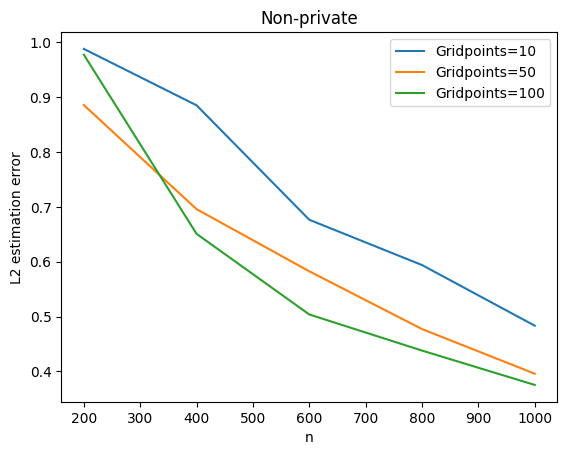

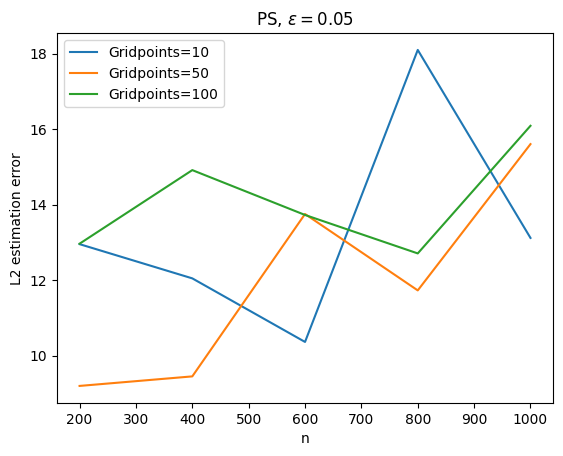

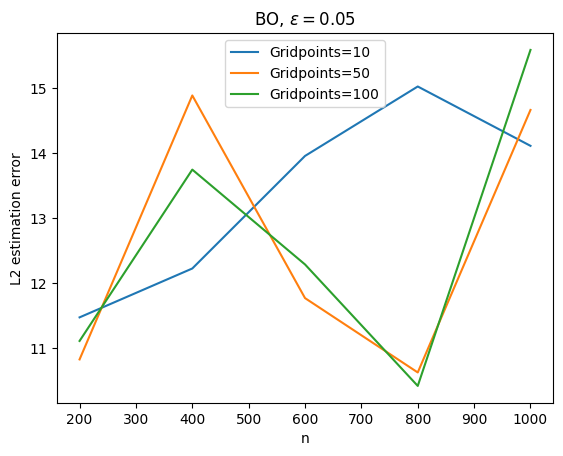

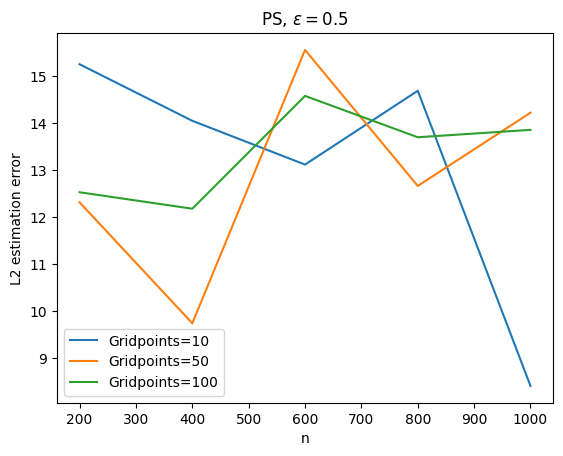

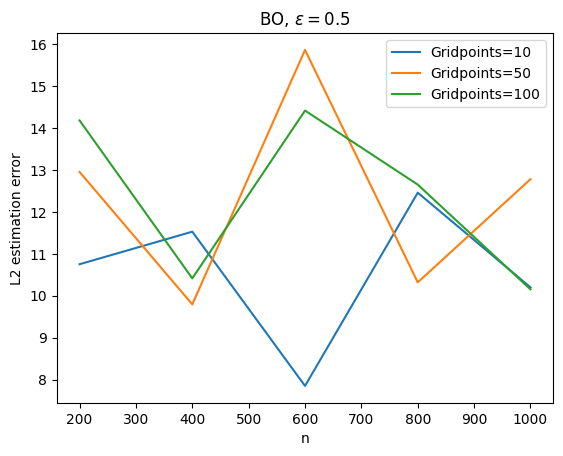

In [3]:
# Sample sizes considered
ns = [200, 400, 600, 800, 1000]

# Grid sizes considered
ngrids = [10, 50, 100]

plt.figure()
# NP_exponent = []
for g in range(len(ngrids)):
    ### Non-private
    NP = []
    for i in range(len(ns)):
        file = "exp1_" + str(ns[i]) + "_non-private_" + str(ngrids[g]) +".csv"
        dat = pd.read_csv(file)
    
        NP_n = np.mean(dat["NP_est_err"])
        NP.append(NP_n)

    plt.plot(ns, NP, label="Gridpoints=" + str(ngrids[g]))

plt.title("Non-private")
plt.legend()
plt.xlabel("n")    
plt.ylabel("L2 estimation error")
# plt.show()
plt.savefig("NP_err.pdf")

# epsilon levels considered
eps = [0.05, 0.5]

# Methods considered
meths = ["PS", "BO"]

for e in range(len(eps)):
    for m in range(len(meths)):
        plt.figure()
        priv_exponent = []
        for g in range(len(ngrids)):
            priv = []
            for i in range(len(ns)):
                file = "exp1_" + str(ns[i]) + "_" + str(eps[e]*100) + "_" + str(ngrids[g]) +".csv"
                dat = pd.read_csv(file)

                priv_n = np.mean(dat.loc[1, meths[m] + "_est_err"])
                priv.append(priv_n)
            
            plt.plot(ns, priv, label="Gridpoints=" + str(ngrids[g]))
    
        plt.title(meths[m] + ", $\epsilon=$" + str(eps[e]))
        plt.legend()
        plt.xlabel("n")    
        plt.ylabel("L2 estimation error")
        # plt.show()
        plt.savefig(meths[m] + ", epsilon=" + str(eps[e]*100) + "_err.pdf")

In [4]:
# exponent = pd.DataFrame([ngrids, NP_exponent], columns = ['n', 'NP'])


# ### Private
# # epsilon levels considered
# epss = [0.05, 0.5]



# # For a fixed epsilon, grid
# PS = []
# BO = []
# for i in range(len(ns)):
#     file = "exp1_" + str(ns[i]) + "_non-private_" + str(ngrid) +".csv"
#     dat = pd.read_csv(file)

#     PS_n = np.mean(dat["PS"+"_lambda_hat"])
#     BO_n = np.mean(dat["BO"+"_lambda_hat"])
    
#     PS.append(calculation1)
#     BO.append(calculation2)

# df_calc = pd.DataFrame([ns, PS, BO], columns = ['n', 'PS', 'BO'])


# pd.DataFrame(columns = ["n", "NP", "PS", "BO"])
# # OR

# for i in range(len(somethiing)):
#     calculation1 = df.iloc[i, 1] * ....
#     calculation2 = df.iloc[i, 3] / ...

#     tmp1 = pd.DataFrame(calculation1, columns = 'thing1')
#     tmp2 = pd.DataFrame(calculation2, columns = 'thing2')

#     list1.append(tmp1)
#     list2.append(tmp2)

# list1_df = pd.concat(list1, aixs = 0)
# final_df = pd.concat([list1_df, list1_df], axis = 1) # append column-wise

# # # epsilons = [0.05, 0.5]
# # # Private
# # epsilon = 0.05
# # file = "exp1_" + str(n) + "_" + str(epsilon*100) + "_" + str(ngrid) +".csv"
# # dat = pd.read_csv(file)


# # dat = pd.read_csv("exp1_1000_5.0_10.csv")
# # dat

# # method = "NP"
# # col = method + "_lambda_hat"

# # # dat.iloc[0, :]
# # # dat["NP_lambda_hat"]